# Seattle Airbnb Listings


## Context:

This dataset was created with the help of Tom Slee's Airbnb Data Collection codebase that can be found at 

https://github.com/tomslee/airbnb-data-collection

Its purpose is to understand the real estate and short-term rental market in growing markets like Seattle.

## Content:

The data was scrapped on December 19th, 2018 and contains roughly 8000 listings of current Airbnb listings in Seattle. The data has the price, reviews, latitude, longitude, bedroom, bathroom, number of guests it accommodates, room type, and more.

## Goal:

Predict the price of a room 

1. Import des librairies usuelles 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

2. Import de la dataset ```listings.csv```

In [3]:
listings = pd.read_csv("listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


3. On a beaucoup de données dans ce dataset. Affichons toutes les colonnes du dataset

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

4. Révisons un peu Seaborn, affichez la distribution des prix dans le dataset 

In [5]:
listings.price.head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

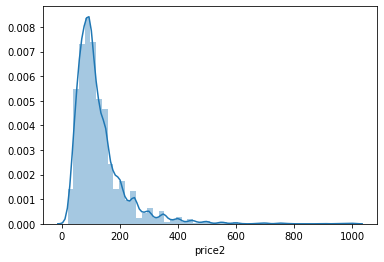

In [6]:
# Alternative

listings["price2"] = listings.price.apply(lambda x: x[1:])
#listings["price2"] = listings.price.str.replace(",","").astype(float)
listings["price2"] = listings.price2.apply(lambda x: float(x.replace(",","")))
sns.distplot(listings["price2"])

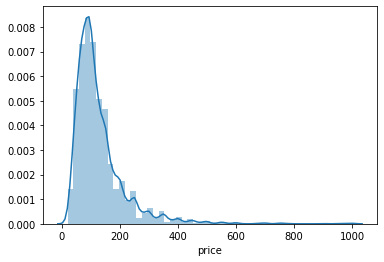

In [7]:
# Alternative
listings.price = listings.price.apply(lambda x: x[1:])
listings.price = listings.price.replace("1,000.00", "1000").astype(float)
sns.distplot(listings.price)

5. Supprimons les outliers pour ne garder que les appartements qui ont un prix inférieur à 400$/nuit 

In [8]:
avg_priced_dataset = listings[listings.price <= 400]
avg_priced_dataset.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,price2
count,3.755000e+03,3.755000e+03,3.755000e+03,3753.000000,3753.000000,3755.000000,3755.000000,3755.000000,3739.000000,3749.000000,...,3108.000000,3113.000000,3108.000000,3115.000000,3111.000000,3110.000000,0.0,3755.000000,3138.000000,3755.000000
mean,5.556910e+06,2.016010e+13,1.579411e+07,7.146283,7.146283,47.628887,-122.332935,3.272703,1.236026,1.270739,...,9.635135,9.552843,9.784106,9.807705,9.607522,9.452412,NaN,2.944607,2.096539,120.749933
std,2.966011e+06,0.000000e+00,1.459490e+07,28.711382,28.711382,0.043270,0.031759,1.868531,0.556459,0.824873,...,0.700417,0.801180,0.599360,0.571147,0.629853,0.749495,NaN,5.882812,1.827941,68.744681
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,20.000000
25%,3.256584e+06,2.016010e+13,3.258368e+06,1.000000,1.000000,47.609078,-122.354154,2.000000,1.000000,1.000000,...,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.700000,75.000000
50%,6.127974e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623451,-122.328750,2.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.560000,100.000000
75%,8.047928e+06,2.016010e+13,2.592334e+07,3.000000,3.000000,47.662976,-122.310698,4.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.020000,150.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,400.000000


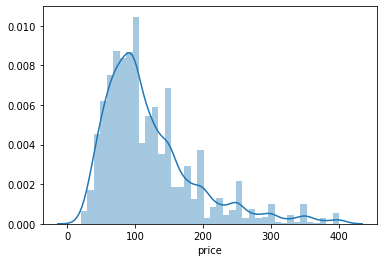

In [9]:
sns.distplot(avg_priced_dataset.price)

6. Exprimez le prix en fonction des variables suivantes : 

- ```room type```
- ```beds```
- ```property type```

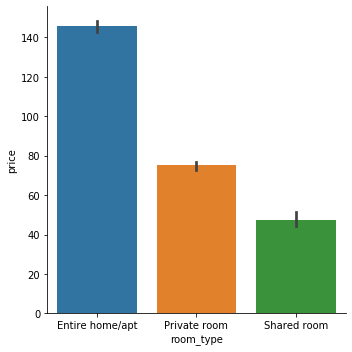

In [10]:
sns.catplot(x="room_type", y="price", data=avg_priced_dataset, kind="bar")

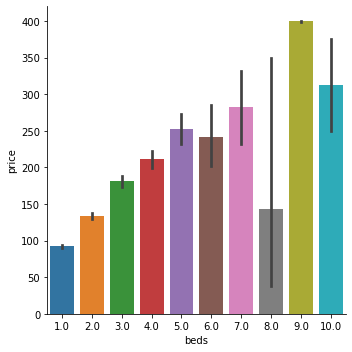

In [11]:
sns.catplot(x="beds", y="price", data=avg_priced_dataset, kind="bar")

In [12]:
avg_priced_dataset[avg_priced_dataset.beds==8]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price2
997,8424532,https://www.airbnb.com/rooms/8424532,20160104002432,2016-01-04,Ideal Home for Small Reunions,Lge home- corner lot -walking distance to Lak...,NaN,Lge home- corner lot -walking distance to Lak...,none,NaN,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.67,350.0
1069,6119821,https://www.airbnb.com/rooms/6119821,20160104002432,2016-01-04,Green Tortoise Hostel,Our centrally located Seattle hostel is famous...,Conveniently located at First Avenue and Pike ...,Our centrally located Seattle hostel is famous...,none,The Green Tortoise is located right in the hea...,...,f,NaN,WASHINGTON,f,moderate,f,f,2,2.47,38.0
1073,8212989,https://www.airbnb.com/rooms/8212989,20160104002432,2016-01-04,Green Tortoise,Our centrally located Seattle hostel is famous...,NaN,Our centrally located Seattle hostel is famous...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,2,2.57,41.0


C:\Users\jrala\Anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


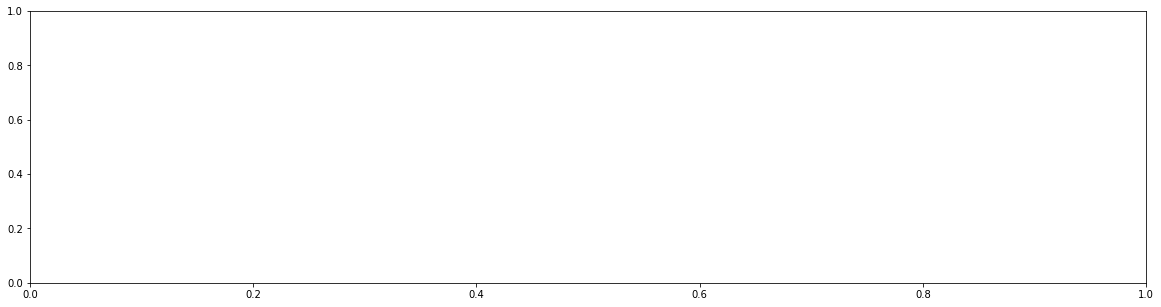

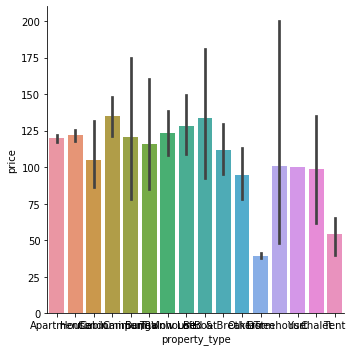

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
sns.catplot(x="property_type", y="price", data=avg_priced_dataset, kind="bar", ax=ax)

7. Séparons la variable cible de notre dataset

In [14]:
X = avg_priced_dataset.loc[:, avg_priced_dataset.columns!="price"]
#X = avg_priced_dataset.drop(["price"], axis = 1)
y = avg_priced_dataset.loc[:, avg_priced_dataset.columns=="price"]

In [15]:
col=['experiences_offered', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']

In [16]:
a=X.isnull().sum()/X.shape[0]*100
a.sort_values(ascending=False)

license             100.000000
square_feet          97.443409
monthly_price        60.053262
security_deposit     51.504660
weekly_price         47.270306
                       ...    
smart_location        0.000000
market                0.000000
state                 0.000000
city                  0.000000
id                    0.000000
Length: 92, dtype: float64

In [17]:
X_clean = X.drop(["host_since", 
            "host_location", 
            "host_about", 
            "host_thumbnail_url", 
            "host_picture_url",
           "license",
           "monthly_price",
           "square_feet",
            "host_verifications", 
        "street", 
        "neighbourhood", 
        "neighbourhood_cleansed", 
        "city", 
        "state", 
        "market", 
        "smart_location",
        "country_code",
        "country",
        "is_location_exact",
        "amenities",
        "jurisdiction_names",
        "first_review",
        "last_review",
        "calendar_last_scraped",
        "weekly_price",
            "notes",
                  "neighborhood_overview",
         "name",
                  "description",
                  "listing_url" ,
"host_id",
"host_url",
                 "scrape_id",
                 "space",
                 "picture_url",
                 "last_scraped",
                 "host_name",
                 "medium_url",
                 "summary",
                 "xl_picture_url",
                 "transit",
                 "thumbnail_url",
                 "host_neighbourhood",
                 "zipcode",
                 "calendar_updated",
                 "license","id"], axis=1)

In [18]:
#alternative
X[col]

,experiences_offered,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,none,within a few hours,96%,100%,f,3.0,3.0,t,t,Queen Anne,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,none,within an hour,98%,100%,t,6.0,6.0,t,t,Queen Anne,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
3,none,NaN,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
5,none,NaN,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,...,10.0,10.0,10.0,f,f,strict,f,f,1,2.45
6,none,within an hour,100%,100%,t,1.0,1.0,t,t,Queen Anne,...,10.0,10.0,10.0,f,f,moderate,f,f,1,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,none,within a few hours,99%,100%,f,354.0,354.0,t,t,Other neighborhoods,...,8.0,10.0,8.0,f,f,strict,f,f,8,0.30
3814,none,within an hour,100%,100%,f,1.0,1.0,t,t,Capitol Hill,...,10.0,10.0,10.0,f,f,moderate,f,f,1,2.00
3815,none,NaN,NaN,NaN,f,1.0,1.0,t,f,Rainier Valley,...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
3816,none,within an hour,100%,NaN,f,1.0,1.0,t,t,Capitol Hill,...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN


9 Cleaning

In [19]:
X_clean.isnull().sum().sort_values()

experiences_offered                    0
minimum_nights                         0
maximum_nights                         0
has_availability                       0
availability_30                        0
availability_60                        0
availability_90                        0
guests_included                        0
availability_365                       0
requires_license                       0
instant_bookable                       0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
number_of_reviews                      0
bed_type                               0
extra_people                           0
price2                                 0
accommodates                           0
room_type                              0
longitude                              0
latitude                               0
neighbourhood_group_cleansed           0
beds            

In [20]:
X_clean.cleaning_fee

0           NaN
1        $40.00
3           NaN
5        $40.00
6           NaN
         ...   
3813    $230.00
3814     $50.00
3815     $35.00
3816     $45.00
3817        NaN
Name: cleaning_fee, Length: 3755, dtype: object

In [21]:
# Pour la suite, nous remplirons les valeurs NaN de la manière la plus simple possible 
X_clean.cleaning_fee = X_clean.cleaning_fee.apply(lambda x: float(x[1:])/100 if type(x) == str else x)
X_clean.cleaning_fee = X_clean.cleaning_fee.fillna(0)

In [22]:
# Nous devons enlever le caractère $ de chacun des prix pour rendre les variables numériques
X_clean["host_response_rate_clean"] = X_clean.host_response_rate.apply(lambda x: float(x[:-1])/100 if type(x) == str else x)
X_clean = X_clean.drop("host_response_rate", axis =1)


In [23]:
X_clean["host_acceptance_rate_clean"] = X_clean.host_acceptance_rate.apply(lambda x: int(x[:-1])/100 if type(x) == str else x)
X_clean = X_clean.drop("host_acceptance_rate", axis = 1)

In [24]:
X_clean.host_response_time.value_counts()

within an hour        1675
within a few hours     947
within a day           584
a few days or more      38
Name: host_response_time, dtype: int64

In [25]:
X_clean.host_has_profile_pic = X_clean.host_has_profile_pic.fillna("f")
X_clean.host_identity_verified = X_clean.host_identity_verified.fillna("f")

X_clean.host_response_time = X_clean.host_response_time.fillna("Unknown")
X_clean.host_is_superhost = X_clean.host_is_superhost.fillna("Unknown")
X_clean.property_type = X_clean.property_type.fillna("unknown")

X_clean.extra_people = X_clean.extra_people.apply(lambda x: float(x[1:]))
X_clean.security_deposit = X_clean.security_deposit.apply(lambda x: float(str(x).replace(",","").replace("nan","$0")[1:]))
X_clean.security_deposit = X_clean.security_deposit.fillna(0)


In [26]:
X_clean.isnull().sum().sort_values(ascending=False)

host_acceptance_rate_clean          749
review_scores_accuracy              647
review_scores_checkin               647
review_scores_value                 645
review_scores_location              644
review_scores_cleanliness           642
review_scores_communication         640
review_scores_rating                636
reviews_per_month                   617
host_response_rate_clean            511
bathrooms                            16
bedrooms                              6
host_listings_count                   2
host_total_listings_count             2
beds                                  1
property_type                         0
accommodates                          0
room_type                             0
host_response_time                    0
longitude                             0
latitude                              0
host_is_superhost                     0
security_deposit                      0
neighbourhood_group_cleansed          0
host_identity_verified                0


10. Vérifiez que toutes les variables numériques le sont effectivement bien. (N'oubliez pas de regarder y)

In [27]:
y = y.apply(lambda x: float(x[1:]) if type(x)==str else x)

11. Séparons les variables en deux groupes, les variables numériques d'un côté et les qualitatives de l'autre.

In [28]:
num_col = X_clean.select_dtypes([np.number]).columns
cat_col = X_clean.select_dtypes("object").columns

X_num = X_clean[num_col]
X_cat =  pd.get_dummies(X_clean[cat_col],drop_first=True)

12. Faites maintenant un ```train_test_split```

In [29]:
from sklearn.model_selection import train_test_split



X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_num, X_cat, y, test_size =0.2)

13. Normalisons ```X_train_num``` & ```X_test_num``` et rassemblons les deux groupes de variables

In [30]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()


X_train_num_norm = pd.DataFrame(sc_x.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_test_num_norm = pd.DataFrame(sc_x.transform(X_test_num),columns=X_test_num.columns, index = X_test_num.index)

X_train = pd.merge(X_train_num_norm, X_train_cat,left_index=True, right_index=True)
X_test = pd.merge(X_test_num_norm, X_test_cat,left_index=True, right_index=True)



14. Géstion des valeurs NaN

In [31]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


C:\Users\jrala\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\jrala\Anaconda3\lib\site-packages\missingpy\pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
C:\Users\jrala\Anaconda3\lib\site-packages\missingpy\pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
C:\Users\jrala\Anaconda3\lib\site-packages\miss

15. Entrainons d'abord un modèle d'Adaboost standard et regardons notre score 


In [32]:
X_test = X_test.drop("price2", axis=1)

In [33]:
X_train = X_train.drop("price2", axis=1)

In [34]:

from sklearn.ensemble import AdaBoostRegressor 
regressor_ada = AdaBoostRegressor()
regressor_ada.fit(X_train, y_train)
regressor_ada.score(X_test, y_test)

#np.sqrt(np.mean((regressor_ada.predict(X_test) - y_test.values)**2))

C:\Users\jrala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.43534765738328474

16. Entrainons ensuite un modèle XGBoost et regardons notre score 

In [37]:
!pip install xgboost
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, y_train)
regressor_xgb.score(X_test, y_test)

0.6684389779528234

In [91]:
from sklearn.model_selection import GridSearchCV
regressor_ada = AdaBoostRegressor()
parameters = {'n_estimators':[40,50,70],
              "learning_rate":[1.0, 0.9]}

regressor_ada_best = GridSearchCV(regressor_ada, parameters, verbose=20)
regressor_ada_best.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=1.0, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=40, score=0.407, total=   0.7s
[CV] learning_rate=1.0, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=40, score=0.438, total=   0.8s
[CV] learning_rate=1.0, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=40, score=0.480, total=   0.8s
[CV] learning_rate=1.0, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=40, score=0.456, total=   0.6s
[CV] learning_rate=1.0, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=40, score=0.389, total=   0.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=50, score=0.398, total=   0.9s
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=50, score=0.435, total=   1.0s
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.6s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=50, score=0.499, total=   0.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.3s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=50, score=0.429, total=   0.8s
[CV] learning_rate=1.0, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.2s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=50, score=0.390, total=   1.0s
[CV] learning_rate=1.0, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.2s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=70, score=0.348, total=   1.3s
[CV] learning_rate=1.0, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    9.4s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=70, score=0.417, total=   1.2s
[CV] learning_rate=1.0, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   10.6s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=70, score=0.478, total=   0.6s
[CV] learning_rate=1.0, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   11.2s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=70, score=0.466, total=   0.6s
[CV] learning_rate=1.0, n_estimators=70 ..............................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   11.8s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=1.0, n_estimators=70, score=0.430, total=   0.9s
[CV] learning_rate=0.9, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.7s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=40, score=0.416, total=   0.8s
[CV] learning_rate=0.9, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   13.4s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=40, score=0.447, total=   0.8s
[CV] learning_rate=0.9, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   14.3s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=40, score=0.483, total=   0.7s
[CV] learning_rate=0.9, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   15.0s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=40, score=0.434, total=   0.9s
[CV] learning_rate=0.9, n_estimators=40 ..............................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   15.9s remaining:    0.0s
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=40, score=0.447, total=   0.8s
[CV] learning_rate=0.9, n_estimators=50 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=50, score=0.396, total=   1.0s
[CV] learning_rate=0.9, n_estimators=50 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=50, score=0.441, total=   1.0s
[CV] learning_rate=0.9, n_estimators=50 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=50, score=0.458, total=   0.9s
[CV] learning_rate=0.9, n_estimators=50 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=50, score=0.461, total=   0.5s
[CV] learning_rate=0.9, n_estimators=50 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=50, score=0.408, total=   1.0s
[CV] learning_rate=0.9, n_estimators=70 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=70, score=0.450, total=   0.5s
[CV] learning_rate=0.9, n_estimators=70 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=70, score=0.420, total=   1.3s
[CV] learning_rate=0.9, n_estimators=70 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=70, score=0.459, total=   1.0s
[CV] learning_rate=0.9, n_estimators=70 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=70, score=0.427, total=   0.9s
[CV] learning_rate=0.9, n_estimators=70 ..............................


/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.9, n_estimators=70, score=0.353, total=   1.2s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   26.1s finished
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.9],
                         'n_estimators': [40, 50, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=20)

In [86]:
from sklearn.model_selection import GridSearchCV
regressor_ada = AdaBoostRegressor()
parameters = {'n_estimators':[40,50,70, 100, 150, 200],
              "learning_rate":[1.0, 0.9, 0.8, 0.7, 0.6, 0.5]}

regressor_ada_best = GridSearchCV(regressor_ada, parameters)
regressor_ada_best.fit(X_train, y_train)

/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5],
                         'n_estimators': [40, 50, 70, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
regressor_ada_best.best_params_

{'learning_rate': 0.5, 'n_estimators': 40}

In [88]:
regressor_ada_best.best_estimator_.score(X_test,y_test)

0.5513150657438721

In [42]:
from sklearn.model_selection import GridSearchCV
regressor_ada = AdaBoostRegressor(n_estimators=40,learning_rate=0.5)
regressor_ada.fit(X_train, y_train)

/home/exalis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='linear',
                  n_estimators=40, random_state=None)

---> Même avec beaucoup plus d'estimateurs, nous n'arrivons pas au score de XGBoost